# Regresión Logística

### Integrantes
* Yesid Shair Rosas Toro
* Samara Smith Rincon Montaña
* Cristian Camilo Quiceno Laurente

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

1- Usando como base el siguiente dataset, desarrolle un sistema de clasificación. Solo debe usar las tres dependencias agregadas como base en el script.

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


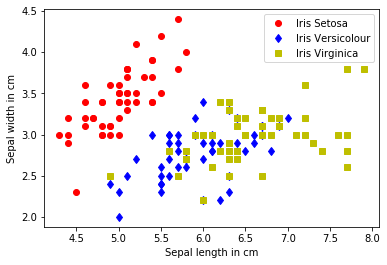

In [5]:
# cargar data
data = sio.loadmat('Datasets/dataFI.mat')
data = np.array(list(data.values()))

# se cargan las caracteriticas de las plantas 
X=data[3]
# se cargan las etiquetas.
t=data[4]
t= np.argmax(t, axis=1)

# Clases
setosa      = X[0:49,0:2].T
versicolour = X[50:99,0:2].T
virginica   = X[100:,0:2].T

# se grafica una comparación entre las plantas con etiqueta 0 y 1
plt.plot(setosa[0], setosa[1],'or')
plt.plot(versicolour[0], versicolour[1],'db')
plt.plot(virginica[0], virginica[1],'sy')

plt.xlabel("Sepal length in cm")
plt.ylabel("Sepal width in cm")
plt.legend(["Iris Setosa","Iris Versicolour","Iris Virginica"])
plt.show()

2 - Programe cinco funciones (0.8):

    - Función de costo para la función sigmoidal.
    - Función para calcular el grandiente.
    - Función sigmoidal.
    - Función de normalización de X.
    - Función de exactitud.


In [3]:
# Revisar
def costo(t, tp):
    return -t * np.ln(tp) - (1-t) * np.ln(1 - tp)

def grad(w, X, y, t, a = 0.0002):
    diff = y - t
    
    for i in range(len(w)):
        dp = np.mean(diff @ X.T[i])
        w[i] = w[i] - (a * dp)
        
    return w

def sigm(X):
    return 1 / (1 + np.exp(-X))

def norm(X):
    for i in range(1, X.shape[1]):
        X[:,i] = (X[:,i] - np.mean(X[:,i])) / np.std(X[:,i])
    return X

def exact(t, tp):
    return 1 - (np.sum(np.abs(t - tp)) / len(t))

3- Desarrolle un algoritmo biclase, que use gradiente descendiente para realizar la califiación entre las clases. 
Recuerde que el gradiente esta dado por la formula:

$w_{j} = w_{j} - \alpha \Delta$

La función desarrollada debería recibir como parámetro $X$ y $t$.
La función de error debe ser basada en el error logístico.
Debe retornar w, $\hat{t}$, número de iteración y error obtenido (0.8).

In [4]:
def regresion_logistica_biclase(X, t):
    X = norm(X)
    
    m = X.shape[0]
    np.random.seed(0)
    w = np.random.rand(m)
    
    y = sigm(X @ w)
    p = umbral(y)

    error = costo(t, y)
    err_relativo = 1

    n = 0
    while err_relativo > 0.075 and n < 100000:
        w = grad(w, X, y, t)
        y = sigm(X @ w)
        p = umbral(y)
        
        error = costo(t, y)
        err_relativo = error_relativo(err_esperado, error)
        n += 1
        
    return w, p, error, n

def umbral(y):
    y[y <  .5] = 0
    y[y >= .5] = 1
    return y

def error_relativo(real, aprox):
    return abs((real - aprox) / real)

4- Programe una función para usar el $holdout$ $method$ aleatorio. La separación del conjunto de pruebas con el de entrenamiento debe ser con base parámetros que digan cuanto porcentaje se desea usar para entrenamiento y cuanto para pruebas (use w para predecir las clases del conjunto de pruebas). Puede usar cómo parámetro por defecto el 60% y 40% respectivamente (0.5). 

In [6]:
def houldout(X, w, porc_entrenam=0.6):
    porc_prueba = 1 - porc_entrenam
    
    m = len(X[0])
    n = len(w)
    
    Xe = np.ones((m, n * porc_entrenam))
    we = np.ones(n * porc_entrenam)
    e  = 0
    
    Xp = np.ones((m, n * porc_prueba))
    wp = np.ones(n * porc_prueba)
    p  = 0
    
    for i in range(n):
        val = np.random.random()
        if val < porc_entrenam:
            Xe[:,e] = X[:,i]
            we[e] = w[i]
            e += 1
        else:
            Xp[:,p] = X[:,i]
            wp[p] = w[i]
            p += 1
    
    return Xe, we, Xp, wp

5- Use la clase Iris Setosa e Iris Versicolour para realizar una clasificación biclase. Para este usé el holdout method y determine la exactitud del conjuto de entrenamiento (60%) y el conjunto de prueba (40%). Recuerde normalizar las características (0.7).

In [ ]:
def obtenerX(indice):
    pass

6- Use la clase Iris Versicolour e Iris Virginica para realizar una clasificación biclase. Para este usé el holdout method y determine la exactitud del conjuto de entrenamiento (60%) y el conjunto de prueba (40%). Recuerde normalizar las características (0.6).

7- Use la clase Iris Setosa e Iris Virginica para realizar una clasificación biclase. Para este usé el holdout method y determine la exactitud del conjuto de entrenamiento (60%) y el conjunto de prueba (40%). Recuerde normalizar las características (0.6).

8- Ahora realice un entrenamiento uno contra todos usando las tres clases de Iris. Para este usé el holdout method y determine la exactitud del conjuto de entrenamiento (70%) y el conjunto de prueba (30%). Recuerde normalizar las características (1.0).